<a href="https://colab.research.google.com/github/Ludmi0611/Analisis-Predictivo-Tienda-Minorista/blob/main/Proyecto_An%C3%A1lisis_Predictivo_para_una_Tienda_Minorista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación de Datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = '/content/drive/MyDrive/Udemy- Python para data science/dia 11/Ventas.csv'

In [ ]:
df = pd.read_csv(ruta)
df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [ ]:
#Obtengo mas información del DataFrame y observo que la columna Fecha tiene un tipo de dato object en vez de datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [ ]:
#Convierto la columna Fecha a datetime y lo verifico
df['Fecha'] = pd.to_datetime(df['Fecha'])
type(df['Fecha'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
escala= MinMaxScaler(feature_range=(0,1))

#Elimino las columhnas no deseadas y guardo los nombres de las columnas que voy a escalar
columnas_para_escalar = df.drop(['Ventas', 'Fecha'], axis=1).columns

#Ajusto el MinMaxScaler a las columnas restantes y transformo los datos
normado= escala.fit_transform(df[columnas_para_escalar])

#Creo un nuevo DataFrame con los datos normalizados y columnas correctas
df_normado = pd.DataFrame(data=normado, columns=columnas_para_escalar)

df_normado['Ventas'] = df['Ventas']
df_normado['Fecha'] = df['Fecha']

df_normado.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [ ]:
#Identifico las variables dependientes e independientes
X = df_normado.drop(['Ventas', 'Fecha'], axis=1)
y = df['Ventas']

In [ ]:
#Divido en conjuntos de entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

# Análisis Exploratorio de Datos (EDA)

In [ ]:
#Estadísticas descriptivas
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


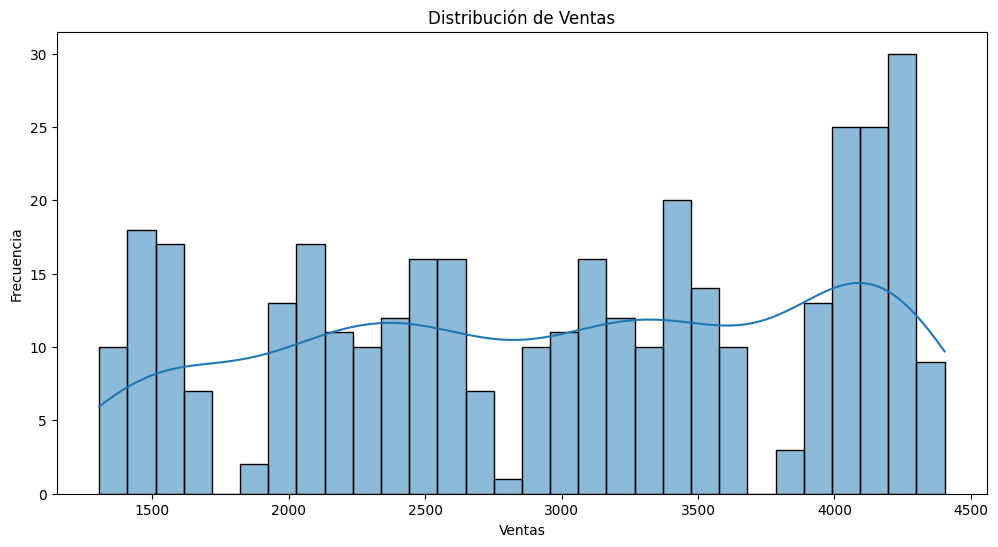

In [ ]:
#Visualizacion de la distribución de ventas
plt.figure(figsize=(12,6))
sns.histplot(df['Ventas'], bins=30, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia');

<ipython-input-24-2f562bc9b0f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='DíaDeLaSemana', y='Ventas', palette='Purples')


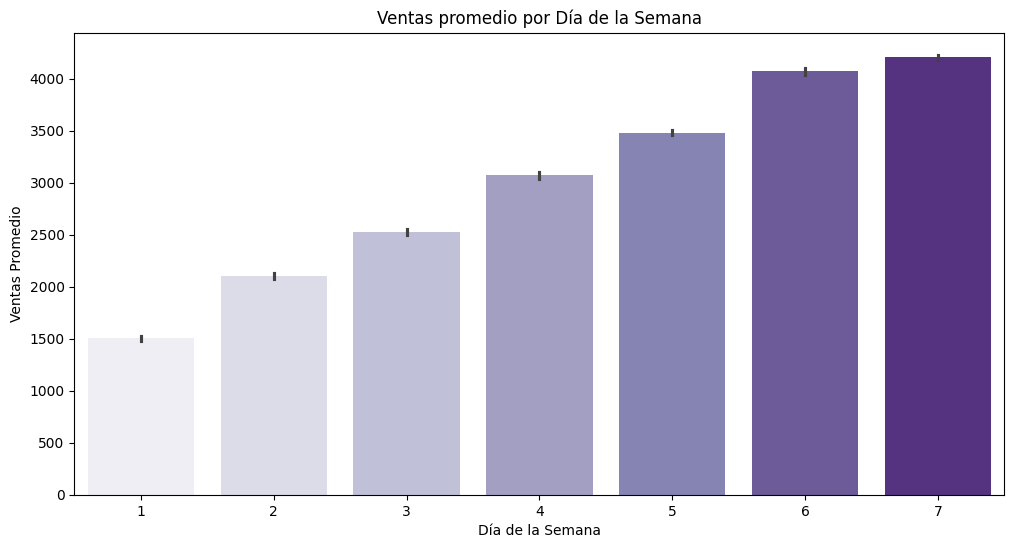

In [ ]:
#Relación entre ventas y día de la semana con promedio de ventas
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='DíaDeLaSemana', y='Ventas', palette='Purples')
plt.title('Ventas promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio');

<ipython-input-27-61eade86cbd3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promociones', y='Ventas', data=df,  palette='Purples')
<ipython-input-27-61eade86cbd3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Festivo', y='Ventas', data=df,  palette='Purples')


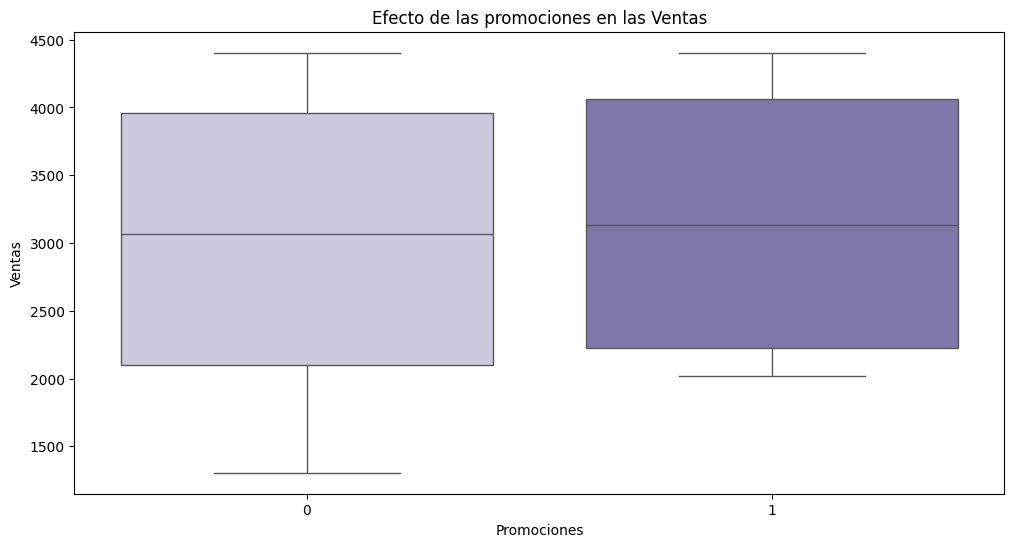

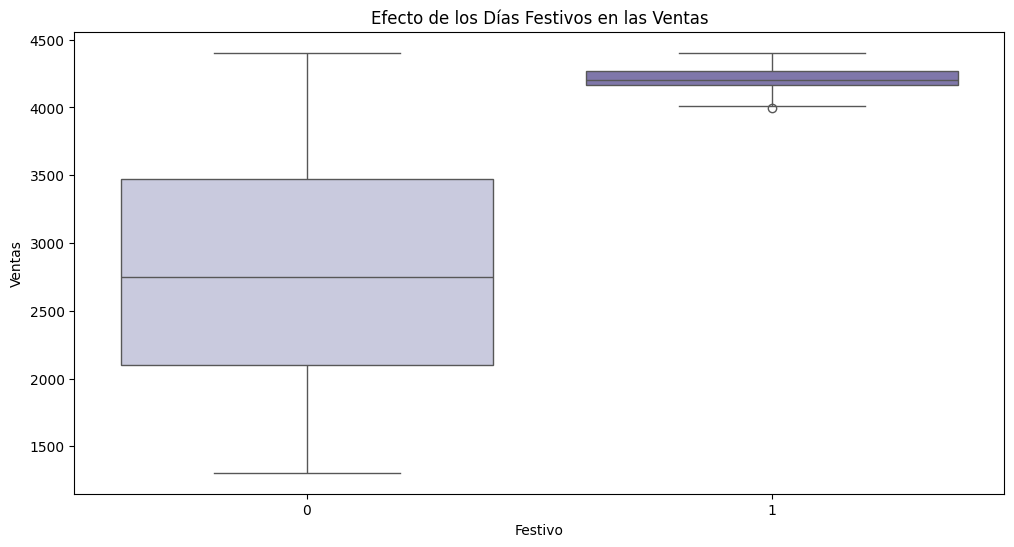

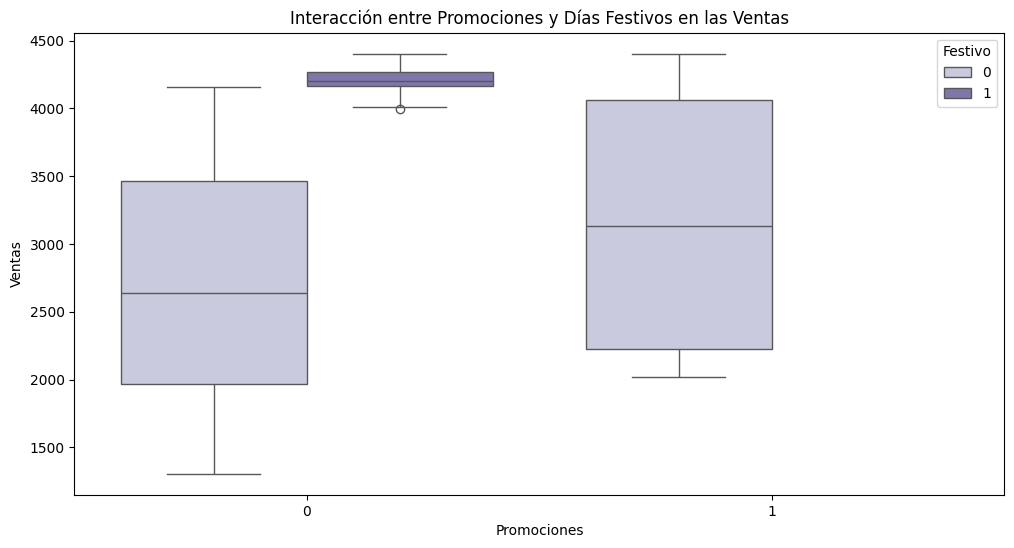

In [ ]:
#Boxplot para comparar las ventas con y sin promociones.
plt.figure(figsize=(12,6))
sns.boxplot(x='Promociones', y='Ventas', data=df,  palette='Purples')
plt.title('Efecto de las promociones en las Ventas')

#Boxplot para comparar las ventas para los días normales y festivos.
plt.figure(figsize=(12,6))
sns.boxplot(x='Festivo', y='Ventas', data=df,  palette='Purples')
plt.title('Efecto de los Días Festivos en las Ventas')

#Boxplot para ver la interacción entre promociones y días festivos en las ventas
plt.figure(figsize=(12,6))
sns.boxplot(x='Promociones', y='Ventas',hue='Festivo',  data=df,  palette='Purples')
plt.title('Interacción entre Promociones y Días Festivos en las Ventas');


# Selección del modelo

In [ ]:
modelos = [
    ('modelo lineal', LinearRegression()),
    ('modelo arbol', DecisionTreeRegressor(random_state=42)),
    ('modelo bosque', RandomForestRegressor(random_state=42))
]

In [ ]:
#Entreno modelos y muestro puntaje
for nombre, modelo in modelos:
  modelo.fit(X_entrena, y_entrena)
  puntaje= modelo.score(X_prueba, y_prueba)
  print(f'{nombre}: {puntaje}')

modelo lineal: 0.9924245101323563
modelo arbol: 0.9923508015371342
modelo bosque: 0.9923097376813321


# Entrenamiento y evaluación del modelo

In [ ]:
# Alojo el modelo de Regresión Lineal en una variable
modelo_lineal = LinearRegression()

#Entreno el modelo con los datps de entrenamiento
modelo_lineal.fit(X_entrena, y_entrena)

#Realizo predicciones usando el conjunto de prueba
predicciones_lineal = modelo_lineal.predict(X_prueba)

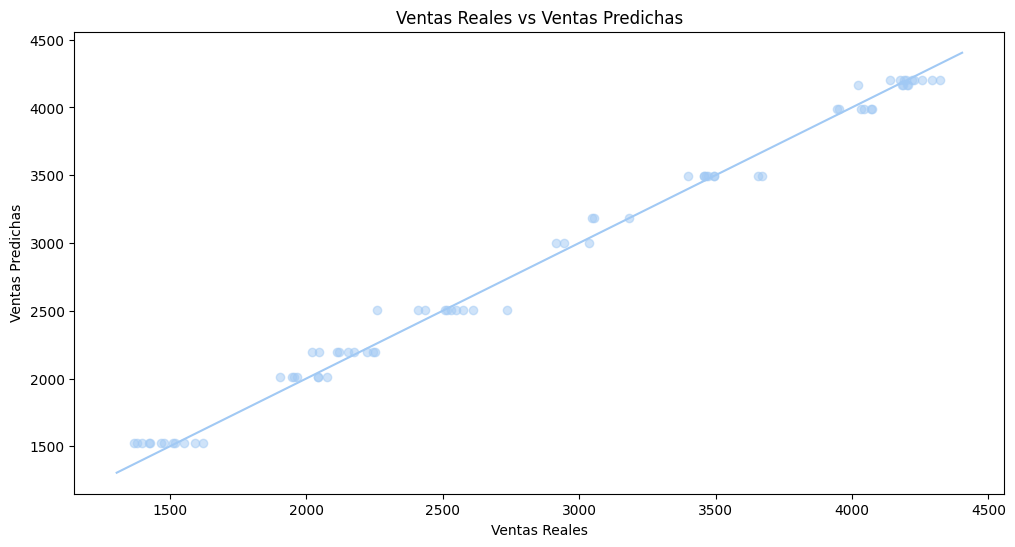

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_prueba, predicciones_lineal, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas');

In [ ]:
df_test = pd.DataFrame({'Real': y_prueba, 'Predicho': predicciones_lineal})
df_test = df_test.sort_index()

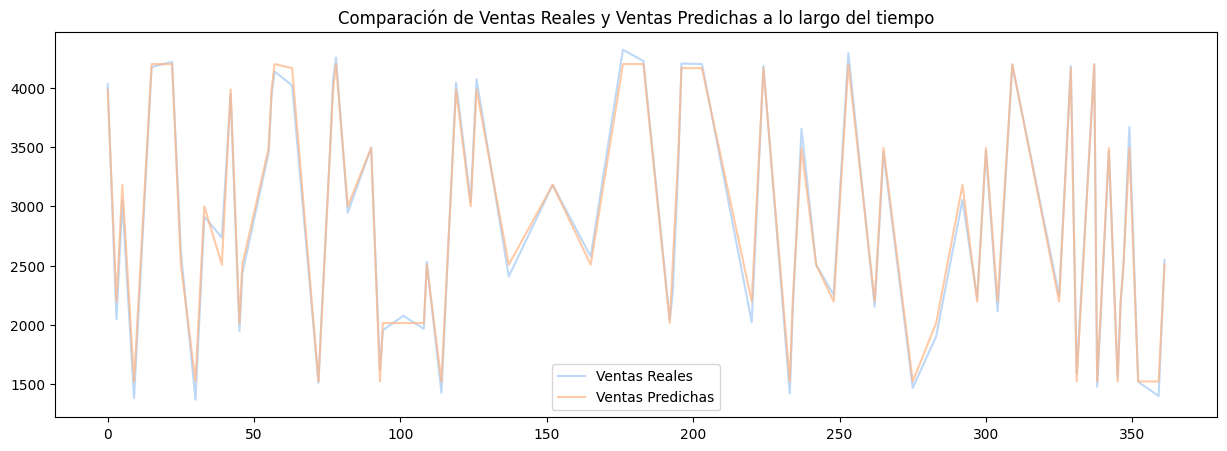

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_test['Real'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Predicho'], label='Ventas Predichas', alpha=0.7)
plt.legend()
plt.title('Comparación de Ventas Reales y Ventas Predichas a lo largo del tiempo');


# Conlusión
1. El primer gráfico, que muestra un diagrama de dispersión de las Ventas Reales vs Ventas Predichas, sugiere que el modelo de regresión lineal está haciendo un buen trabajo al predecir las ventas. La línea de tendencia indica una fuerte relación positiva entre los valores reales y predichos, lo que es un signo prometedor de que el modelo puede capturar la tendencia de las ventas con eficiencia.
2. El segundo gráfico compara las Ventas Reales y las Ventas Predichas a lo largo del tiempo y también parece seguir a un patrón similar, aunque hay algunos puntos en los que las predicciones y los valores reales difieren significativamente. Esto puede deberse a eventos no capturados por las variables en tu modelo o las variaciones naturales en las ventas que no son predecibles.

Aquí hay algunas recomendaciones para la tienda minorista:

* Optimización del Inventario: Utiliza las predicciones para gestionar mejor el inventario. La fechas festivas pueden requerir un stock adicional para evitar la falta de productos.
* Planificación de Personal: Ajusta los horarios del personal según días festivos, y no necesariamente según días de promociones.
* Marketin Dirigido: Si identificas patrones de cuándo las ventas son más fuertes, puedes sirigir las campañas de marketing para esos períodos y potencialmente aumentar aún más las ventas.
* Análisis de Anomalías: Investiga aquellos puntos donde hay grandes desviaciones entre las ventas reales y las predichas para entender mejor los factores no capturados por el modelo.
* Mejoras en el Modelo: Considera incluir más variables en el modelo que puedas afectar las ventas, como datos económicos generales, eventos locales, competencia, o incluso el clima.